In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import time as time
import pyarrow as pa
import dask.dataframe as dd
import dask.array as da
from dask.distributed import Client
import dask
import gc
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import bottleneck
import haversine as hs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pygad
from multiprocessing import cpu_count
from os import sched_getaffinity
from collections import Counter
import random 



In [3]:
def wind_eval(orig_height, target_height, ds, surface_roughness):
    """Takes in an xarray dataset and evaluates the wind speed magnitude at a certain height using formula, 
    then creates a new variables and assigns it to the database and replaces the original wind speed magnitude.
    Note: Sets values of wind magnitude > 25m/s to zero."""
    #creating magnitude
    ds = ds.assign(wind_mag=lambda ds: np.sqrt(ds.u100**2 + ds.v100**2))
    
    #function to adjust for height of wind turbine
    def multiply(x,surface_roughness=surface_roughness,orig_height=orig_height,target_height=target_height):
        alpha = 0.5*(surface_roughness/10)**0.2
        factor = (target_height/orig_height)**alpha
        return x*factor
        
    ds['wind_mag'] = xr.apply_ufunc(multiply, ds['wind_mag'],input_core_dims=[["longitude","latitude"]],
               output_core_dims=[["longitude", "latitude"]], dask = 'allowed', vectorize = True)
    #dropping values above 25ms-1 (cut-out speed)
    ds['wind_mag'] = ds['wind_mag'].where((ds['wind_mag']<=25) & (ds['wind_mag']>0),0, drop=False)
    ds.wind_mag.attrs["units"] = "m s**-1"
    return ds

In [4]:
#importing dataset
paths = ["/share/data1/xzcaplbl/100m_1982_to_2022_8.3MW.nc"]
ds = xr.open_mfdataset(paths, parallel=True,chunks={'latitude': -1, 'longitude': -1, 'time': -1} ,concat_dim='time', data_vars='minimal',combine='nested',coords='minimal',compat='override')

/share/data1/xzcaplbl/anaconda3/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.29.0
  warnings.warn(


Currently, the Uk predicts that by 2050 the low demand energy required is 575Twh of electricity HOWEVER, the high demand is 672Twh (https://assets.publishing.service.gov.uk/media/5fd3c4b08fa8f54d5ba9c104/Modelling-2050-Electricity-System-Analysis.pdf). Currently the UK produces only 30.1Twh of electricty via renewable energy forms as of Q3 of 2023 (https://assets.publishing.service.gov.uk/media/6582da2d23b70a0013234cef/Energy_Trends_December_2023.pdf). Therefore if there is no advancements in until 2050, the uk will be missing 544.9Twh of energy or a constant 62.20GW power supply per year for the low case OR in the high case, missing 641.9Twh of energy or a constant 73.28GW supply. 

## 1 - 100 Generations 



Generation 1 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 2 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 3 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 4 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 5 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 6 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 7 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 8 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 9 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 10 - Fitness = -0.01021754825127751, Mean Merged Power = 21.268443359375
Generation 11 - Fitness = -0.010194880686382538, Mean Merged Power = 23.706166015625
Generation 12 - Fitness = -0.010194880686382538, Mean Merged Power = 23.706166015625

Generation 9 - Fitness = -0.010162435593883476, Mean Merged Power = 17.56287890625
Generation 10 - Fitness = -0.010162435593883476, Mean Merged Power = 17.56287890625
Generation 11 - Fitness = -0.010162435593883476, Mean Merged Power = 17.56287890625
Generation 12 - Fitness = -0.010162435593883476, Mean Merged Power = 17.56287890625
Generation 13 - Fitness = -0.010162435593883476, Mean Merged Power = 17.56287890625
Generation 14 - Fitness = -0.00961224276015997, Mean Merged Power = 21.19978515625
Generation 15 - Fitness = -0.00961224276015997, Mean Merged Power = 21.19978515625
Generation 16 - Fitness = -0.00961224276015997, Mean Merged Power = 21.19978515625
Generation 17 - Fitness = -0.00961224276015997, Mean Merged Power = 21.19978515625
Generation 18 - Fitness = -0.00961224276015997, Mean Merged Power = 21.19978515625
Generation 19 - Fitness = -0.00961224276015997, Mean Merged Power = 21.19978515625
Generation 20 - Fitness = -0.00961224276015997, Mean Merged Power = 21.19978515625


Generation 18 - Fitness = -0.00990934730285394, Mean Merged Power = 22.077884765625
Generation 19 - Fitness = -0.00990934730285394, Mean Merged Power = 22.077884765625
Generation 20 - Fitness = -0.00990934730285394, Mean Merged Power = 22.077884765625

Run 9 - Best Coordinates:
Latitude: 69.25, Longitude: 9.5
Latitude: 56.5, Longitude: -3.25
Latitude: 54.25, Longitude: 12.5
Latitude: 54.5, Longitude: 8.25
Latitude: 53.75, Longitude: -10.0
Mean Merged Power: 22.077884765625 MW
Generation 1 - Fitness = -0.010421164424389227, Mean Merged Power = 23.69276953125
Generation 2 - Fitness = -0.010421164424389227, Mean Merged Power = 23.69276953125
Generation 3 - Fitness = -0.008774134235881687, Mean Merged Power = 19.281505859375
Generation 4 - Fitness = -0.008774134235881687, Mean Merged Power = 19.281505859375
Generation 5 - Fitness = -0.008774134235881687, Mean Merged Power = 19.281505859375
Generation 6 - Fitness = -0.008774134235881687, Mean Merged Power = 19.281505859375
Generation 7 - Fi

Generation 3 - Fitness = -0.01062324503931573, Mean Merged Power = 25.55873828125
Generation 4 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 5 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 6 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 7 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 8 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 9 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 10 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 11 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 12 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 13 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 14 - Fitness = -0.009773443619558512, Mean Merged Power = 22.2524609375
Generation 

Generation 11 - Fitness = -0.00968977898958602, Mean Merged Power = 24.60151171875
Generation 12 - Fitness = -0.00968977898958602, Mean Merged Power = 24.60151171875
Generation 13 - Fitness = -0.00968977898958602, Mean Merged Power = 24.60151171875
Generation 14 - Fitness = -0.00968977898958602, Mean Merged Power = 24.60151171875
Generation 15 - Fitness = -0.00968977898958602, Mean Merged Power = 24.60151171875
Generation 16 - Fitness = -0.00968977898958602, Mean Merged Power = 24.60151171875
Generation 17 - Fitness = -0.009288868514359009, Mean Merged Power = 23.5938203125
Generation 18 - Fitness = -0.009288868514359009, Mean Merged Power = 23.5938203125
Generation 19 - Fitness = -0.009288868514359009, Mean Merged Power = 23.5938203125
Generation 20 - Fitness = -0.009288868514359009, Mean Merged Power = 23.5938203125

Run 18 - Best Coordinates:
Latitude: 63.25, Longitude: 17.0
Latitude: 62.25, Longitude: 3.75
Latitude: 56.5, Longitude: 7.5
Latitude: 55.0, Longitude: 17.0
Latitude: 69.

Generation 19 - Fitness = -0.009290201855392127, Mean Merged Power = 23.163859375
Generation 20 - Fitness = -0.009290201855392127, Mean Merged Power = 23.163859375

Run 22 - Best Coordinates:
Latitude: 62.0, Longitude: -10.75
Latitude: 62.0, Longitude: 7.5
Latitude: 55.5, Longitude: -11.75
Latitude: 56.5, Longitude: 11.5
Latitude: 55.0, Longitude: -12.25
Mean Merged Power: 23.163859375 MW
Generation 1 - Fitness = -0.010279088483098737, Mean Merged Power = 25.2144453125
Generation 2 - Fitness = -0.010279088483098737, Mean Merged Power = 25.2144453125
Generation 3 - Fitness = -0.010279088483098737, Mean Merged Power = 25.2144453125
Generation 4 - Fitness = -0.010038048113016599, Mean Merged Power = 18.65491015625
Generation 5 - Fitness = -0.010038048113016599, Mean Merged Power = 18.65491015625
Generation 6 - Fitness = -0.010038048113016599, Mean Merged Power = 18.65491015625
Generation 7 - Fitness = -0.010038048113016599, Mean Merged Power = 18.65491015625
Generation 8 - Fitness = -0.01

Generation 4 - Fitness = -0.010311580526490281, Mean Merged Power = 23.72208203125
Generation 5 - Fitness = -0.010311580526490281, Mean Merged Power = 23.72208203125
Generation 6 - Fitness = -0.010311580526490281, Mean Merged Power = 23.72208203125
Generation 7 - Fitness = -0.010246426212651937, Mean Merged Power = 24.230275390625
Generation 8 - Fitness = -0.010246426212651937, Mean Merged Power = 24.230275390625
Generation 9 - Fitness = -0.010246426212651937, Mean Merged Power = 24.230275390625
Generation 10 - Fitness = -0.010246426212651937, Mean Merged Power = 24.230275390625
Generation 11 - Fitness = -0.010246426212651937, Mean Merged Power = 24.230275390625
Generation 12 - Fitness = -0.010246426212651937, Mean Merged Power = 24.230275390625
Generation 13 - Fitness = -0.010246426212651937, Mean Merged Power = 24.230275390625
Generation 14 - Fitness = -0.010246426212651937, Mean Merged Power = 24.230275390625
Generation 15 - Fitness = -0.010246426212651937, Mean Merged Power = 24.23

Generation 11 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 12 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 13 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 14 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 15 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 16 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 17 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 18 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 19 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625
Generation 20 - Fitness = -0.0096992485115045, Mean Merged Power = 20.744666015625

Run 31 - Best Coordinates:
Latitude: 60.5, Longitude: -8.5
Latitude: 62.25, Longitude: 11.0
Latitude: 69.5, Longitude: -7.75
Latitude: 63.0, Longitude: 11.75
Latitude: 5

Generation 18 - Fitness = -0.008971919748669456, Mean Merged Power = 19.564318359375
Generation 19 - Fitness = -0.008971919748669456, Mean Merged Power = 19.564318359375
Generation 20 - Fitness = -0.008971919748669456, Mean Merged Power = 19.564318359375

Run 35 - Best Coordinates:
Latitude: 69.5, Longitude: 4.0
Latitude: 59.75, Longitude: 9.5
Latitude: 53.75, Longitude: -4.0
Latitude: 64.0, Longitude: 12.5
Latitude: 67.25, Longitude: -3.5
Mean Merged Power: 19.564318359375 MW
Generation 1 - Fitness = -0.010380342866297732, Mean Merged Power = 14.33510546875
Generation 2 - Fitness = -0.010380342866297732, Mean Merged Power = 14.33510546875
Generation 3 - Fitness = -0.010380342866297732, Mean Merged Power = 14.33510546875
Generation 4 - Fitness = -0.010380342866297732, Mean Merged Power = 14.33510546875
Generation 5 - Fitness = -0.010380342866297732, Mean Merged Power = 14.33510546875
Generation 6 - Fitness = -0.010380342866297732, Mean Merged Power = 14.33510546875
Generation 7 - Fitne

Generation 3 - Fitness = -0.010356647695596029, Mean Merged Power = 20.21608984375
Generation 4 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 5 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 6 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 7 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 8 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 9 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 10 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 11 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 12 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 13 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625
Generation 14 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Generation 20 - Fitness = -0.009736017058042508, Mean Merged Power = 21.99587890625

Run 40 - Best Coordinates:
Latitude: 60.25, Longitude: 1.5
Latitude: 51.75, Longitude: -11.0
Latitude: 51.25, Longitude: 12.5
Latitude: 63.75, Longitude: 10.0
Latitude: 56.25, Longitude: 0.5
Mean Merged Power: 21.99587890625 MW


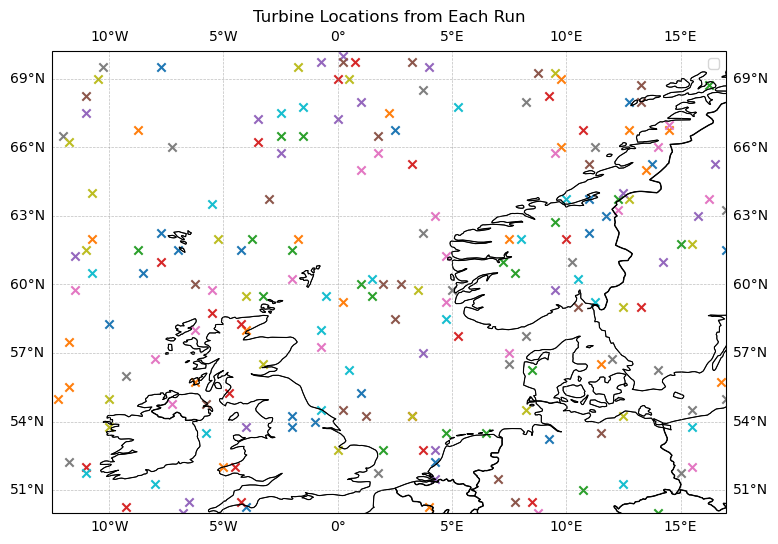

In [4]:
# Load the dataset
paths = ["/share/data1/xzcaplbl/100m_1982_to_2022_8.3MW.nc"]
ds = xr.open_mfdataset(paths, parallel=True, chunks={'latitude': -1, 'longitude': -1, 'time': -1},
                        concat_dim='time', data_vars='minimal', combine='nested',
                        coords='minimal', compat='override')

# Define the range of latitude and longitude
latitudes = np.arange(50, 70.25, 0.25)
longitudes = np.arange(-12.5, 17.25, 0.25)

# Define parameters or genetic algorithm
population_size = 100
mutation_rate = 0.6
max_generations = 50
num_turbines = 5  # Number of turbines
target_fitness = -0.0010 # Define the target fitness value

# Define demand center coordinates
demand_center = (52.776584171224556, -1.5821643532504668)  # Latitude, Longitude

def distance(coord1, coord2):
    # Calculate the distance between two coordinates using Haversine formula
    R = 6371.0  # Radius of the Earth in kilometers
    lat1, lon1 = np.radians(coord1)
    lat2, lon2 = np.radians(coord2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

def penalty_distance(coordinates):
    total_distance = 0
    for i in range(len(coordinates)):
        for j in range(i + 1, len(coordinates)):
            dist = distance(coordinates[i], coordinates[j])
            total_distance += dist
    
    transmission_loss_penalty = (total_distance / 100) * 0.01 # 1% loss per 100km
    return transmission_loss_penalty

def normalize_loss(loss):
    # Normalize loss to a value between 0 and 1
    return 1 / (1 + loss)

def merge_power_plots(chromosome):
    # Reshape chromosome to match the dimensions of the power data array
    chromosome_2d = chromosome.reshape((len(latitudes), len(longitudes)))
    
    
    power_plots = []
    coordinates = []  # Store the coordinates used

    # Select 10 random locations
    selected_indices = random.sample(range(len(latitudes) * len(longitudes)), num_turbines)
    selected_coords = [(index // len(longitudes), index % len(longitudes)) for index in selected_indices]

    for lat, lon in selected_coords:
        latitude = latitudes[lat]
        longitude = longitudes[lon]
        power_ds_subset = ds.sel(latitude=latitude, longitude=longitude)['power'].values
        power_plots.append(power_ds_subset)
        coordinates.append((latitude, longitude))  # Store the coordinates

    # Concatenate power plots along the time dimension and sum them
    merged_power = np.sum(np.stack(power_plots, axis=0), axis=0)
    
    # Calculate the mean of the merged power values
    merged_power_mean = np.mean(merged_power)/1000
    
    # Calculate the standard deviation of the merged power values
    merged_power_std = np.std(merged_power)
    
    # Calculate transmission loss penalty for each coordinate and normalize it
    transmission_loss_penalty = penalty_distance(coordinates)
    normalized_losses = [normalize_loss(transmission_loss_penalty) for _ in range(len(coordinates))]
    
    # Multiply normalized losses by mean power at each location
    power_normalized = np.array([normalized_losses[i] * merged_power_mean for i in range(len(normalized_losses))])
    
    # Sum these values
    total_power_loss = np.sum(power_normalized)

    return merged_power_mean, merged_power_std, coordinates, total_power_loss

def fitness(chromosome, coordinates):
    _, _, coordinates, total_power_loss = merge_power_plots(chromosome)
    merged_power_mean = _ 
    merged_power_std = _ 
    transmission_loss_penalty = penalty_distance(coordinates)
    fitness_value = -(merged_power_std / merged_power_mean) * (1 / total_power_loss)
    return fitness_value, merged_power_mean


def initialize_population(population_size, num_turbines, demand_center, latitudes, longitudes):
    population = []
    for _ in range(population_size):
        
        latitudes_near_center = np.random.uniform(demand_center[0]-1, demand_center[0]+1, num_turbines)
        longitudes_near_center = np.random.uniform(demand_center[1]-1, demand_center[1]+1, num_turbines)
        
        # Convert coordinates to indices
        indices = [(np.argmin(np.abs(latitudes - lat)), np.argmin(np.abs(longitudes - lon))) 
                   for lat, lon in zip(latitudes_near_center, longitudes_near_center)]
        
        
        chromosome = np.zeros(len(latitudes) * len(longitudes), dtype=bool)
        for i, j in indices:
            chromosome[i * len(longitudes) + j] = 1
        
        population.append(chromosome)
    
    return np.array(population)

def run_genetic_algorithm(max_generations):
    best_solution = None
    best_fitness = -float('inf')  # Set initial best fitness to negative infinity
    best_coordinates = []
    best_mean_power = None
    generations = 0

    # Generate initial population
    population = initialize_population(population_size, num_turbines, demand_center, latitudes, longitudes)

    while generations < max_generations:
        # Calculate fitness values for the current population
        fitness_values = np.array([fitness(chromosome, []) for chromosome in population])

        # Get the index of the best solution in this generation
        current_best_fitness = np.max(fitness_values[:, 0])

        # Check if the current solution is better than the previous best
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_solution = population[np.argmax(fitness_values[:, 0])]
            best_mean_power, _, best_coordinates,_= merge_power_plots(best_solution)
            print(f"Generation {generations+1} - Fitness = {current_best_fitness}, Mean Merged Power = {best_mean_power}")
        else:
            print(f"Generation {generations+1} - Fitness = {best_fitness}, Mean Merged Power = {best_mean_power}")

        # Check if target fitness is reached
        if current_best_fitness >= target_fitness:
            break
                
        # Genetic algorithm operations (selection, crossover, mutation)
        new_population = []
        for _ in range(1, population_size):  # Start from index 1 to retain the best solution
            # Selection (tournament selection, for example)
            parent1 = population[random.randint(0, population_size-1)]
            parent2 = population[random.randint(0, population_size-1)]
            # Crossover (single point crossover, for example)
            crossover_point = random.randint(0, len(parent1)-1)
            child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            # Mutation
            mutation_mask = np.random.rand(len(child)) < mutation_rate
            child[mutation_mask] = np.logical_not(child[mutation_mask])
            new_population.append(child)

        population[1:] = np.array(new_population)
        generations += 1

    return best_solution, best_fitness, best_coordinates, best_mean_power



def plot_coordinates(all_best_coordinates):
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-12.5, 17, 50, 70])

    # Add coastlines with the cartopy.feature module
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')
    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='50m',
        edgecolor='black',
        facecolor='none'
    )
    ax.add_feature(countries, linestyle='-', linewidth=0.5)
    # Add borders to specific countries (e.g., Germany and France)
    borders = cfeature.BORDERS
    ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)

    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    plt.grid()
    # Add wind speed overlay here (not implemented in this code snippet)

    for i, coords in enumerate(all_best_coordinates):
        lats, lons = zip(*coords)
        ax.scatter(lons, lats, marker='x',transform=ccrs.PlateCarree())

    # Add legend and title
    ax.legend()
    ax.set_title("Turbine Locations from Each Run")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()



num_runs = 40
generations_per_run = 20

# Store the best coordinates from each run
all_best_coordinates = []

for run in range(num_runs):
    # Run the genetic algorithm
    best_solution, best_fitness, best_coordinates, best_mean_power = run_genetic_algorithm(generations_per_run)
    
    # Store the best coordinates from this run
    all_best_coordinates.append(best_coordinates)

    # Print the best coordinates and mean power from this run
    print(f"\nRun {run + 1} - Best Coordinates:")
    for coord in best_coordinates:
        print(f"Latitude: {coord[0]}, Longitude: {coord[1]}")
    print("Mean Merged Power:", best_mean_power, "MW")


plot_coordinates(all_best_coordinates)


In [ ]:
# Load the dataset
paths = ["/share/data1/xzcaplbl/100m_1982_to_2022_8.3MW.nc"]
ds = xr.open_mfdataset(paths, parallel=True, chunks={'latitude': -1, 'longitude': -1, 'time': -1},
                        concat_dim='time', data_vars='minimal', combine='nested',
                        coords='minimal', compat='override')

# Define the range of latitude and longitude
latitudes = np.arange(50, 70.25, 0.25)
longitudes = np.arange(-12.5, 17.25, 0.25)

# Define parameters or genetic algorithm
population_size = 200
mutation_rate = 0.6
max_generations = 50
num_turbines = 5  # Number of turbines
target_fitness = -0.0080 # Define the target fitness value

# Define demand center coordinates
demand_center = (52.776584171224556, -1.5821643532504668)  # Latitude, Longitude

def distance(coord1, coord2):
    # Calculate the distance between two coordinates using Haversine formula
    R = 6371.0  # Radius of the Earth in kilometers
    lat1, lon1 = np.radians(coord1)
    lat2, lon2 = np.radians(coord2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

def penalty_distance(coordinates):
    total_distance = 0
    for i in range(len(coordinates)):
        for j in range(i + 1, len(coordinates)):
            dist = distance(coordinates[i], coordinates[j])
            total_distance += dist
    
    transmission_loss_penalty = (total_distance / 100) * 0.01 # 1% loss per 100km
    return transmission_loss_penalty

def normalize_loss(loss):
    # Normalize loss to a value between 0 and 1
    return 1 / (1 + loss)

def merge_power_plots(chromosome):
    # Reshape chromosome to match the dimensions of the power data array
    chromosome_2d = chromosome.reshape((len(latitudes), len(longitudes)))
    
    
    power_plots = []
    coordinates = []  # Store the coordinates used

    # Select 10 random locations
    selected_indices = random.sample(range(len(latitudes) * len(longitudes)), num_turbines)
    selected_coords = [(index // len(longitudes), index % len(longitudes)) for index in selected_indices]

    for lat, lon in selected_coords:
        latitude = latitudes[lat]
        longitude = longitudes[lon]
        power_ds_subset = ds.sel(latitude=latitude, longitude=longitude)['power'].values
        power_plots.append(power_ds_subset)
        coordinates.append((latitude, longitude))  # Store the coordinates

    # Concatenate power plots along the time dimension and sum them
    merged_power = np.sum(np.stack(power_plots, axis=0), axis=0)
    
    # Calculate the mean of the merged power values
    merged_power_mean = np.mean(merged_power)/1000
    
    # Calculate the standard deviation of the merged power values
    merged_power_std = np.std(merged_power)
    
    # Calculate transmission loss penalty for each coordinate and normalize it
    transmission_loss_penalty = penalty_distance(coordinates)
    normalized_losses = [normalize_loss(transmission_loss_penalty) for _ in range(len(coordinates))]
    
    # Multiply normalized losses by mean power at each location
    power_normalized = np.array([normalized_losses[i] * merged_power_mean for i in range(len(normalized_losses))])
    
    # Sum these values
    total_power_loss = np.sum(power_normalized)

    return merged_power_mean, merged_power_std, coordinates, total_power_loss

def fitness(chromosome, coordinates):
    _, _, coordinates, total_power_loss = merge_power_plots(chromosome)
    merged_power_mean = _ 
    merged_power_std = _ 
    transmission_loss_penalty = penalty_distance(coordinates)
    fitness_value = -(merged_power_std / merged_power_mean) * (1 / total_power_loss)
    return fitness_value, merged_power_mean


def initialize_population(population_size, num_turbines, demand_center, latitudes, longitudes):
    population = []
    for _ in range(population_size):
        
        latitudes_near_center = np.random.uniform(demand_center[0]-1, demand_center[0]+1, num_turbines)
        longitudes_near_center = np.random.uniform(demand_center[1]-1, demand_center[1]+1, num_turbines)
        
        # Convert coordinates to indices
        indices = [(np.argmin(np.abs(latitudes - lat)), np.argmin(np.abs(longitudes - lon))) 
                   for lat, lon in zip(latitudes_near_center, longitudes_near_center)]
        
        
        chromosome = np.zeros(len(latitudes) * len(longitudes), dtype=bool)
        for i, j in indices:
            chromosome[i * len(longitudes) + j] = 1
        
        population.append(chromosome)
    
    return np.array(population)

def run_genetic_algorithm(max_generations):
    best_solution = None
    best_fitness = -float('inf')  # Set initial best fitness to negative infinity
    best_coordinates = []
    best_mean_power = None
    generations = 0

    # Generate initial population
    population = initialize_population(population_size, num_turbines, demand_center, latitudes, longitudes)

    while generations < max_generations:
        # Calculate fitness values for the current population
        fitness_values = np.array([fitness(chromosome, []) for chromosome in population])

        # Get the index of the best solution in this generation
        current_best_fitness = np.max(fitness_values[:, 0])

        # Check if the current solution is better than the previous best
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_solution = population[np.argmax(fitness_values[:, 0])]
            best_mean_power, _, best_coordinates,_= merge_power_plots(best_solution)
            print(f"Generation {generations+1} - Fitness = {current_best_fitness}, Mean Merged Power = {best_mean_power}")
        else:
            print(f"Generation {generations+1} - Fitness = {best_fitness}, Mean Merged Power = {best_mean_power}")

        # Check if target fitness is reached
        if current_best_fitness >= target_fitness:
            break
                
        # Genetic algorithm operations (selection, crossover, mutation)
        new_population = []
        for _ in range(1, population_size):  # Start from index 1 to retain the best solution
            # Selection (tournament selection, for example)
            parent1 = population[random.randint(0, population_size-1)]
            parent2 = population[random.randint(0, population_size-1)]
            # Crossover (single point crossover, for example)
            crossover_point = random.randint(0, len(parent1)-1)
            child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            # Mutation
            mutation_mask = np.random.rand(len(child)) < mutation_rate
            child[mutation_mask] = np.logical_not(child[mutation_mask])
            new_population.append(child)

        population[1:] = np.array(new_population)
        generations += 1

    return best_solution, best_fitness, best_coordinates, best_mean_power



def plot_coordinates(all_best_coordinates):
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-12.5, 17, 50, 70])

    # Add coastlines with the cartopy.feature module
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')
    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='50m',
        edgecolor='black',
        facecolor='none'
    )
    ax.add_feature(countries, linestyle='-', linewidth=0.5)
    # Add borders to specific countries (e.g., Germany and France)
    borders = cfeature.BORDERS
    ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)

    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    plt.grid()
    # Add wind speed overlay here (not implemented in this code snippet)

    for i, coords in enumerate(all_best_coordinates):
        lats, lons = zip(*coords)
        ax.scatter(lons, lats, marker='x',transform=ccrs.PlateCarree())

    # Add legend and title
    ax.legend()
    ax.set_title("Turbine Locations from Each Run")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()



num_runs = 100
generations_per_run = 50

# Store the best coordinates from each run
all_best_coordinates = []

for run in range(num_runs):
    # Run the genetic algorithm
    best_solution, best_fitness, best_coordinates, best_mean_power = run_genetic_algorithm(generations_per_run)
    
    # Store the best coordinates from this run
    all_best_coordinates.append(best_coordinates)

    # Print the best coordinates and mean power from this run
    print(f"\nRun {run + 1} - Best Coordinates:")
    for coord in best_coordinates:
        print(f"Latitude: {coord[0]}, Longitude: {coord[1]}")
    print("Mean Merged Power:", best_mean_power, "MW")


plot_coordinates(all_best_coordinates)

Generation 1 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 2 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 3 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 4 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 5 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 6 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 7 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 8 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 9 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 10 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 11 - Fitness = -0.009518280622965723, Mean Merged Power = 22.717408203125
Generation 12 - Fitness = -0.009518280622965723, Mean Merged Power = 22.71

Generation 46 - Fitness = -0.008835978251321337, Mean Merged Power = 23.504794921875
Generation 47 - Fitness = -0.008835978251321337, Mean Merged Power = 23.504794921875
Generation 48 - Fitness = -0.008835978251321337, Mean Merged Power = 23.504794921875
Generation 49 - Fitness = -0.008835978251321337, Mean Merged Power = 23.504794921875
Generation 50 - Fitness = -0.008835978251321337, Mean Merged Power = 23.504794921875

Run 2 - Best Coordinates:
Latitude: 53.75, Longitude: -5.75
Latitude: 63.25, Longitude: -8.5
Latitude: 68.5, Longitude: 12.5
Latitude: 53.75, Longitude: -11.75
Latitude: 50.5, Longitude: 14.5
Mean Merged Power: 23.504794921875 MW
Generation 1 - Fitness = -0.010724828030075849, Mean Merged Power = 16.843642578125
Generation 2 - Fitness = -0.010543995609374614, Mean Merged Power = 17.7900234375
Generation 3 - Fitness = -0.009851885168369608, Mean Merged Power = 24.71825390625
Generation 4 - Fitness = -0.009851885168369608, Mean Merged Power = 24.71825390625
Generation 5

Generation 39 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 40 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 41 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 42 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 43 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 44 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 45 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 46 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 47 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 48 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 49 - Fitness = -0.00927169643026729, Mean Merged Power = 25.107345703125
Generation 50 - Fitness = -0.00927169643026729, Mean Merged Power = 25.10734

Generation 32 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 33 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 34 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 35 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 36 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 37 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 38 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 39 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 40 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 41 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 42 - Fitness = -0.008790112512030995, Mean Merged Power = 21.351537109375
Generation 43 - Fitness = -0.008790112512030995, Mean Merged Powe

Generation 24 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 25 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 26 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 27 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 28 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 29 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 30 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 31 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 32 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 33 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 34 - Fitness = -0.009615430943878246, Mean Merged Power = 18.376689453125
Generation 35 - Fitness = -0.009615430943878246, Mean Merged Powe

Generation 17 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 18 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 19 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 20 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 21 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 22 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 23 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 24 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 25 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 26 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 27 - Fitness = -0.009332155819739655, Mean Merged Power = 21.25033984375
Generation 28 - Fitness = -0.009332155819739655, Mean Merged Power = 21.2503

Generation 9 - Fitness = -0.008806176712327324, Mean Merged Power = 23.562111328125
Generation 10 - Fitness = -0.008806176712327324, Mean Merged Power = 23.562111328125
Generation 11 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 12 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 13 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 14 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 15 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 16 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 17 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 18 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 19 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
Generation 20 - Fitness = -0.008722057188144863, Mean Merged Power = 15.8737890625
G

Generation 2 - Fitness = -0.010484477670834802, Mean Merged Power = 21.676474609375
Generation 3 - Fitness = -0.010484477670834802, Mean Merged Power = 21.676474609375
Generation 4 - Fitness = -0.010484477670834802, Mean Merged Power = 21.676474609375
Generation 5 - Fitness = -0.010484477670834802, Mean Merged Power = 21.676474609375
Generation 6 - Fitness = -0.010484477670834802, Mean Merged Power = 21.676474609375
Generation 7 - Fitness = -0.010484477670834802, Mean Merged Power = 21.676474609375
Generation 8 - Fitness = -0.010401756284862538, Mean Merged Power = 20.148966796875
Generation 9 - Fitness = -0.010401756284862538, Mean Merged Power = 20.148966796875
Generation 10 - Fitness = -0.01008280685392223, Mean Merged Power = 24.627919921875
Generation 11 - Fitness = -0.01008280685392223, Mean Merged Power = 24.627919921875
Generation 12 - Fitness = -0.01008280685392223, Mean Merged Power = 24.627919921875
Generation 13 - Fitness = -0.01008280685392223, Mean Merged Power = 24.62791

Generation 46 - Fitness = -0.009254270359067954, Mean Merged Power = 28.672416015625
Generation 47 - Fitness = -0.009254270359067954, Mean Merged Power = 28.672416015625
Generation 48 - Fitness = -0.009254270359067954, Mean Merged Power = 28.672416015625
Generation 49 - Fitness = -0.009254270359067954, Mean Merged Power = 28.672416015625
Generation 50 - Fitness = -0.009254270359067954, Mean Merged Power = 28.672416015625

Run 15 - Best Coordinates:
Latitude: 56.75, Longitude: -7.0
Latitude: 55.25, Longitude: -12.25
Latitude: 58.0, Longitude: -11.0
Latitude: 59.75, Longitude: 1.0
Latitude: 60.25, Longitude: -10.5
Mean Merged Power: 28.672416015625 MW
Generation 1 - Fitness = -0.01132544293454268, Mean Merged Power = 28.59170703125
Generation 2 - Fitness = -0.01132544293454268, Mean Merged Power = 28.59170703125
Generation 3 - Fitness = -0.01132544293454268, Mean Merged Power = 28.59170703125
Generation 4 - Fitness = -0.010607356351348855, Mean Merged Power = 25.4498671875
Generation 5 -

Generation 39 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 40 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 41 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 42 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 43 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 44 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 45 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 46 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 47 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 48 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 49 - Fitness = -0.009081020154683022, Mean Merged Power = 24.55820703125
Generation 50 - Fitness = -0.009081020154683022, Mean Merged Power = 24.5582

Generation 32 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 33 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 34 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 35 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 36 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 37 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 38 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 39 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 40 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 41 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 42 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 43 - Fitness = -0.00901880440518974, Mean Merged Power = 24.07696875
Generation 44 - Fitness = -0.00901880440

Generation 26 - Fitness = -0.00975093707661973, Mean Merged Power = 22.990107421875
Generation 27 - Fitness = -0.00975093707661973, Mean Merged Power = 22.990107421875
Generation 28 - Fitness = -0.009647093388593703, Mean Merged Power = 25.45746875
Generation 29 - Fitness = -0.009647093388593703, Mean Merged Power = 25.45746875
Generation 30 - Fitness = -0.009647093388593703, Mean Merged Power = 25.45746875
Generation 31 - Fitness = -0.009647093388593703, Mean Merged Power = 25.45746875
Generation 32 - Fitness = -0.009628661319573191, Mean Merged Power = 22.491451171875
Generation 33 - Fitness = -0.009628661319573191, Mean Merged Power = 22.491451171875
Generation 34 - Fitness = -0.009628661319573191, Mean Merged Power = 22.491451171875
Generation 35 - Fitness = -0.009628661319573191, Mean Merged Power = 22.491451171875
Generation 36 - Fitness = -0.009628661319573191, Mean Merged Power = 22.491451171875
Generation 37 - Fitness = -0.009628661319573191, Mean Merged Power = 22.49145117187

Generation 19 - Fitness = -0.009466177709507816, Mean Merged Power = 19.098673828125
Generation 20 - Fitness = -0.009466177709507816, Mean Merged Power = 19.098673828125
Generation 21 - Fitness = -0.009466177709507816, Mean Merged Power = 19.098673828125
Generation 22 - Fitness = -0.009466177709507816, Mean Merged Power = 19.098673828125
Generation 23 - Fitness = -0.009466177709507816, Mean Merged Power = 19.098673828125
Generation 24 - Fitness = -0.009466177709507816, Mean Merged Power = 19.098673828125
Generation 25 - Fitness = -0.009466177709507816, Mean Merged Power = 19.098673828125
Generation 26 - Fitness = -0.009466177709507816, Mean Merged Power = 19.098673828125
Generation 27 - Fitness = -0.008911935466482104, Mean Merged Power = 19.97966796875
Generation 28 - Fitness = -0.008911935466482104, Mean Merged Power = 19.97966796875
Generation 29 - Fitness = -0.008911935466482104, Mean Merged Power = 19.97966796875
Generation 30 - Fitness = -0.008911935466482104, Mean Merged Power =

Generation 12 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 13 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 14 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 15 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 16 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 17 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 18 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 19 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 20 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 21 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 22 - Fitness = -0.009398193955578029, Mean Merged Power = 21.098107421875
Generation 23 - Fitness = -0.009398193955578029, Mean Merged Powe

Generation 4 - Fitness = -0.010590335823145607, Mean Merged Power = 20.76459375
Generation 5 - Fitness = -0.010274171307416749, Mean Merged Power = 22.92943359375
Generation 6 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 7 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 8 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 9 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 10 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 11 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 12 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 13 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 14 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
Generation 15 - Fitness = -0.01008830320837893, Mean Merged Power = 17.745298828125
G

Generation 49 - Fitness = -0.009552127661497893, Mean Merged Power = 18.8626796875
Generation 50 - Fitness = -0.009552127661497893, Mean Merged Power = 18.8626796875

Run 28 - Best Coordinates:
Latitude: 65.75, Longitude: -3.25
Latitude: 50.25, Longitude: 17.0
Latitude: 63.75, Longitude: 14.0
Latitude: 51.5, Longitude: 3.75
Latitude: 69.0, Longitude: 3.75
Mean Merged Power: 18.8626796875 MW
Generation 1 - Fitness = -0.01044350109127839, Mean Merged Power = 14.6288681640625
Generation 2 - Fitness = -0.010428356880699156, Mean Merged Power = 28.02308203125
Generation 3 - Fitness = -0.010428356880699156, Mean Merged Power = 28.02308203125
Generation 4 - Fitness = -0.010428356880699156, Mean Merged Power = 28.02308203125
Generation 5 - Fitness = -0.010412457413279999, Mean Merged Power = 24.43276171875
Generation 6 - Fitness = -0.010412457413279999, Mean Merged Power = 24.43276171875
Generation 7 - Fitness = -0.010412457413279999, Mean Merged Power = 24.43276171875
Generation 8 - Fitness =

Generation 42 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875
Generation 43 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875
Generation 44 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875
Generation 45 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875
Generation 46 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875
Generation 47 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875
Generation 48 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875
Generation 49 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875
Generation 50 - Fitness = -0.008781987150990201, Mean Merged Power = 25.801138671875

Run 30 - Best Coordinates:
Latitude: 62.75, Longitude: 3.0
Latitude: 57.25, Longitude: 4.0
Latitude: 57.75, Longitude: -6.25
Latitude: 53.5, Longitude: 0.0
Latitude: 54.0, Longitude: 6.25
Mean Merged Power: 25.801138671875 MW
Generati

Generation 37 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 38 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 39 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 40 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 41 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 42 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 43 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 44 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 45 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 46 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 47 - Fitness = -0.009115617419414843, Mean Merged Power = 25.182416015625
Generation 48 - Fitness = -0.009115617419414843, Mean Merged Powe

Generation 28 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 29 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 30 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 31 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 32 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 33 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 34 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 35 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 36 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 37 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 38 - Fitness = -0.008692921833435984, Mean Merged Power = 15.4839228515625
Generation 39 - Fitness = -0.008692921833435984, Mean 

Generation 20 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 21 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 22 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 23 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 24 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 25 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 26 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 27 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 28 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 29 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 30 - Fitness = -0.008843844558608118, Mean Merged Power = 25.669662109375
Generation 31 - Fitness = -0.008843844558608118, Mean Merged Powe

Generation 13 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 14 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 15 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 16 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 17 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 18 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 19 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 20 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 21 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 22 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 23 - Fitness = -0.009287372643354825, Mean Merged Power = 19.511798828125
Generation 24 - Fitness = -0.009287372643354825, Mean Merged Powe

Generation 5 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 6 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 7 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 8 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 9 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 10 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 11 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 12 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 13 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 14 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 15 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generation 16 - Fitness = -0.009936720229000098, Mean Merged Power = 15.8297890625
Generatio

Generation 1 - Fitness = -0.011187092660507766, Mean Merged Power = 17.8883828125
Generation 2 - Fitness = -0.009963281572777451, Mean Merged Power = 22.824091796875
Generation 3 - Fitness = -0.009963281572777451, Mean Merged Power = 22.824091796875
Generation 4 - Fitness = -0.009963281572777451, Mean Merged Power = 22.824091796875
Generation 5 - Fitness = -0.009963281572777451, Mean Merged Power = 22.824091796875
Generation 6 - Fitness = -0.009963281572777451, Mean Merged Power = 22.824091796875
Generation 7 - Fitness = -0.009963281572777451, Mean Merged Power = 22.824091796875
Generation 8 - Fitness = -0.00861016056151411, Mean Merged Power = 27.124705078125
Generation 9 - Fitness = -0.00861016056151411, Mean Merged Power = 27.124705078125
Generation 10 - Fitness = -0.00861016056151411, Mean Merged Power = 27.124705078125
Generation 11 - Fitness = -0.00861016056151411, Mean Merged Power = 27.124705078125
Generation 12 - Fitness = -0.00861016056151411, Mean Merged Power = 27.124705078

Generation 46 - Fitness = -0.00951436515128286, Mean Merged Power = 25.963798828125
Generation 47 - Fitness = -0.00951436515128286, Mean Merged Power = 25.963798828125
Generation 48 - Fitness = -0.00951436515128286, Mean Merged Power = 25.963798828125
Generation 49 - Fitness = -0.00951436515128286, Mean Merged Power = 25.963798828125
Generation 50 - Fitness = -0.00951436515128286, Mean Merged Power = 25.963798828125

Run 43 - Best Coordinates:
Latitude: 60.75, Longitude: -0.75
Latitude: 64.0, Longitude: -6.25
Latitude: 57.75, Longitude: -11.25
Latitude: 57.5, Longitude: 3.5
Latitude: 57.75, Longitude: -4.0
Mean Merged Power: 25.963798828125 MW
Generation 1 - Fitness = -0.012017191916766574, Mean Merged Power = 21.832455078125
Generation 2 - Fitness = -0.010159682929768411, Mean Merged Power = 23.5030078125
Generation 3 - Fitness = -0.01008161347631801, Mean Merged Power = 20.4492421875
Generation 4 - Fitness = -0.01008161347631801, Mean Merged Power = 20.4492421875
Generation 5 - Fitne

Generation 41 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 42 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 43 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 44 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 45 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 46 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 47 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 48 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 49 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375
Generation 50 - Fitness = -0.009053796900627404, Mean Merged Power = 24.30968359375

Run 45 - Best Coordinates:
Latitude: 60.0, Longitude: -5.25
Latitude: 62.5, Longitude: -12.0
Latitude: 57.75, Longitude: 14.5
Latitude: 54.25, Longitude: -0.75

Generation 33 - Fitness = -0.009480911191119252, Mean Merged Power = 19.971724609375
Generation 34 - Fitness = -0.009480911191119252, Mean Merged Power = 19.971724609375
Generation 35 - Fitness = -0.009480911191119252, Mean Merged Power = 19.971724609375
Generation 36 - Fitness = -0.009480911191119252, Mean Merged Power = 19.971724609375
Generation 37 - Fitness = -0.00925599698682505, Mean Merged Power = 16.958244140625
Generation 38 - Fitness = -0.00925599698682505, Mean Merged Power = 16.958244140625
Generation 39 - Fitness = -0.00925599698682505, Mean Merged Power = 16.958244140625
Generation 40 - Fitness = -0.00925599698682505, Mean Merged Power = 16.958244140625
Generation 41 - Fitness = -0.00925599698682505, Mean Merged Power = 16.958244140625
Generation 42 - Fitness = -0.00925599698682505, Mean Merged Power = 16.958244140625
Generation 43 - Fitness = -0.00925599698682505, Mean Merged Power = 16.958244140625
Generation 44 - Fitness = -0.00925599698682505, Mean Merged Power = 16.9

Generation 25 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 26 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 27 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 28 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 29 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 30 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 31 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 32 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 33 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 34 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 35 - Fitness = -0.008756245085763949, Mean Merged Power = 27.038380859375
Generation 36 - Fitness = -0.008756245085763949, Mean Merged Powe

Generation 18 - Fitness = -0.009757895031849831, Mean Merged Power = 24.4476953125
Generation 19 - Fitness = -0.009757895031849831, Mean Merged Power = 24.4476953125
Generation 20 - Fitness = -0.009757895031849831, Mean Merged Power = 24.4476953125
Generation 21 - Fitness = -0.009757895031849831, Mean Merged Power = 24.4476953125
Generation 22 - Fitness = -0.009757895031849831, Mean Merged Power = 24.4476953125
Generation 23 - Fitness = -0.009757895031849831, Mean Merged Power = 24.4476953125
Generation 24 - Fitness = -0.009757895031849831, Mean Merged Power = 24.4476953125
Generation 25 - Fitness = -0.00975190295641421, Mean Merged Power = 23.612673828125
Generation 26 - Fitness = -0.00975190295641421, Mean Merged Power = 23.612673828125
Generation 27 - Fitness = -0.00975190295641421, Mean Merged Power = 23.612673828125
Generation 28 - Fitness = -0.00975190295641421, Mean Merged Power = 23.612673828125
Generation 29 - Fitness = -0.00975190295641421, Mean Merged Power = 23.612673828125

Generation 11 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 12 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 13 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 14 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 15 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 16 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 17 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 18 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 19 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 20 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 21 - Fitness = -0.009390927189443472, Mean Merged Power = 17.871927734375
Generation 22 - Fitness = -0.009390927189443472, Mean Merged Powe

Generation 4 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 5 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 6 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 7 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 8 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 9 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 10 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 11 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 12 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 13 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 14 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation 15 - Fitness = -0.00935998208033622, Mean Merged Power = 25.46380859375
Generation

Generation 49 - Fitness = -0.009605595819785474, Mean Merged Power = 19.730041015625
Generation 50 - Fitness = -0.009605595819785474, Mean Merged Power = 19.730041015625

Run 56 - Best Coordinates:
Latitude: 62.0, Longitude: 15.0
Latitude: 55.75, Longitude: 15.25
Latitude: 61.0, Longitude: -4.25
Latitude: 54.25, Longitude: -1.0
Latitude: 57.0, Longitude: 15.75
Mean Merged Power: 19.730041015625 MW
Generation 1 - Fitness = -0.010305162198805028, Mean Merged Power = 20.851841796875
Generation 2 - Fitness = -0.010178185127095498, Mean Merged Power = 25.050322265625
Generation 3 - Fitness = -0.010178185127095498, Mean Merged Power = 25.050322265625
Generation 4 - Fitness = -0.010178185127095498, Mean Merged Power = 25.050322265625
Generation 5 - Fitness = -0.010178185127095498, Mean Merged Power = 25.050322265625
Generation 6 - Fitness = -0.010178185127095498, Mean Merged Power = 25.050322265625
Generation 7 - Fitness = -0.010178185127095498, Mean Merged Power = 25.050322265625
Generation 

Generation 42 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875
Generation 43 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875
Generation 44 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875
Generation 45 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875
Generation 46 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875
Generation 47 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875
Generation 48 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875
Generation 49 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875
Generation 50 - Fitness = -0.009296732378600013, Mean Merged Power = 28.5453671875

Run 58 - Best Coordinates:
Latitude: 65.25, Longitude: -1.25
Latitude: 56.5, Longitude: 2.5
Latitude: 61.75, Longitude: -10.0
Latitude: 55.75, Longitude: -10.5
Latitude: 63.75, Longitude: -2.5
Mean Merged Power: 28.5453671875 MW
Generation 1 - Fitness 

Generation 35 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 36 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 37 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 38 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 39 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 40 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 41 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 42 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 43 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 44 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 45 - Fitness = -0.00909647932539006, Mean Merged Power = 20.719951171875
Generation 46 - Fitness = -0.00909647932539006, Mean Merged Power = 20.71995

Generation 28 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 29 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 30 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 31 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 32 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 33 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 34 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 35 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 36 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 37 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 38 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Generation 39 - Fitness = -0.009197887368895508, Mean Merged Power = 15.4412265625
Gene

Generation 23 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 24 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 25 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 26 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 27 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 28 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 29 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 30 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 31 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 32 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 33 - Fitness = -0.009613038002475227, Mean Merged Power = 23.292552734375
Generation 34 - Fitness = -0.009613038002475227, Mean Merged Powe

Generation 18 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 19 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 20 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 21 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 22 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 23 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 24 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 25 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 26 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 27 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 28 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 29 - Fitness = -0.00831010902581939, Mean Merged Power = 26.146453125
Generation 30 - Fitness = -0

Generation 12 - Fitness = -0.00978024004066705, Mean Merged Power = 22.336185546875
Generation 13 - Fitness = -0.00978024004066705, Mean Merged Power = 22.336185546875
Generation 14 - Fitness = -0.00978024004066705, Mean Merged Power = 22.336185546875
Generation 15 - Fitness = -0.00978024004066705, Mean Merged Power = 22.336185546875
Generation 16 - Fitness = -0.009689277133679012, Mean Merged Power = 25.005361328125
Generation 17 - Fitness = -0.009689277133679012, Mean Merged Power = 25.005361328125
Generation 18 - Fitness = -0.009689277133679012, Mean Merged Power = 25.005361328125
Generation 19 - Fitness = -0.009689277133679012, Mean Merged Power = 25.005361328125
Generation 20 - Fitness = -0.009689277133679012, Mean Merged Power = 25.005361328125
Generation 21 - Fitness = -0.009689277133679012, Mean Merged Power = 25.005361328125
Generation 22 - Fitness = -0.009689277133679012, Mean Merged Power = 25.005361328125
Generation 23 - Fitness = -0.009689277133679012, Mean Merged Power = 

Generation 5 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 6 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 7 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 8 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 9 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 10 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 11 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 12 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 13 - Fitness = -0.009615749269460733, Mean Merged Power = 23.384814453125
Generation 14 - Fitness = -0.009562339645194057, Mean Merged Power = 24.81591015625
Generation 15 - Fitness = -0.009562339645194057, Mean Merged Power = 24.81591015625
Generation 16 - Fitness = -0.009562339645194057, Mean Merged Power = 24.

Generation 1 - Fitness = -0.010351165236175732, Mean Merged Power = 19.841478515625
Generation 2 - Fitness = -0.010351165236175732, Mean Merged Power = 19.841478515625
Generation 3 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 4 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 5 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 6 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 7 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 8 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 9 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 10 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 11 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generation 12 - Fitness = -0.010010405084202867, Mean Merged Power = 24.8601015625
Generatio

Generation 47 - Fitness = -0.009504225239055109, Mean Merged Power = 21.614794921875
Generation 48 - Fitness = -0.009504225239055109, Mean Merged Power = 21.614794921875
Generation 49 - Fitness = -0.009504225239055109, Mean Merged Power = 21.614794921875
Generation 50 - Fitness = -0.009504225239055109, Mean Merged Power = 21.614794921875

Run 73 - Best Coordinates:
Latitude: 69.0, Longitude: 11.75
Latitude: 61.0, Longitude: -6.5
Latitude: 52.5, Longitude: -0.75
Latitude: 53.75, Longitude: 13.25
Latitude: 59.0, Longitude: 10.75
Mean Merged Power: 21.614794921875 MW
Generation 1 - Fitness = -0.011906058606062505, Mean Merged Power = 28.09569140625
Generation 2 - Fitness = -0.011251128683459769, Mean Merged Power = 20.655994140625
Generation 3 - Fitness = -0.009605622523328073, Mean Merged Power = 15.543802734375
Generation 4 - Fitness = -0.009605622523328073, Mean Merged Power = 15.543802734375
Generation 5 - Fitness = -0.009605622523328073, Mean Merged Power = 15.543802734375
Generation

Generation 39 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 40 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 41 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 42 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 43 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 44 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 45 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 46 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 47 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 48 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 49 - Fitness = -0.009002382942340329, Mean Merged Power = 26.418849609375
Generation 50 - Fitness = -0.009002382942340329, Mean Merged Powe

Generation 31 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 32 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 33 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 34 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 35 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 36 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 37 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 38 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 39 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 40 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 41 - Fitness = -0.009365197801118367, Mean Merged Power = 23.583783203125
Generation 42 - Fitness = -0.009365197801118367, Mean Merged Powe

Generation 25 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 26 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 27 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 28 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 29 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 30 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 31 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 32 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 33 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 34 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 35 - Fitness = -0.009850002826038345, Mean Merged Power = 21.01283203125
Generation 36 - Fitness = -0.009850002826038345, Mean Merged Power = 21.0128

Generation 18 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 19 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 20 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 21 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 22 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 23 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 24 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 25 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 26 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 27 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 28 - Fitness = -0.009704678412514553, Mean Merged Power = 26.428798828125
Generation 29 - Fitness = -0.009704678412514553, Mean Merged Powe

Generation 10 - Fitness = -0.00994992949281229, Mean Merged Power = 19.974705078125
Generation 11 - Fitness = -0.00994992949281229, Mean Merged Power = 19.974705078125
Generation 12 - Fitness = -0.00994992949281229, Mean Merged Power = 19.974705078125
Generation 13 - Fitness = -0.00994992949281229, Mean Merged Power = 19.974705078125
Generation 14 - Fitness = -0.00994992949281229, Mean Merged Power = 19.974705078125
Generation 15 - Fitness = -0.00994992949281229, Mean Merged Power = 19.974705078125
Generation 16 - Fitness = -0.008761947681792745, Mean Merged Power = 17.0048359375
Generation 17 - Fitness = -0.008761947681792745, Mean Merged Power = 17.0048359375
Generation 18 - Fitness = -0.008761947681792745, Mean Merged Power = 17.0048359375
Generation 19 - Fitness = -0.008761947681792745, Mean Merged Power = 17.0048359375
Generation 20 - Fitness = -0.008761947681792745, Mean Merged Power = 17.0048359375
Generation 21 - Fitness = -0.008761947681792745, Mean Merged Power = 17.004835937

Generation 3 - Fitness = -0.010428942594341123, Mean Merged Power = 23.101072265625
Generation 4 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 5 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 6 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 7 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 8 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 9 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 10 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 11 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 12 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 13 - Fitness = -0.009464682413571276, Mean Merged Power = 27.055197265625
Generation 14 - Fitness = -0.009464682413571276, Mean Merged Power = 27.

Generation 48 - Fitness = -0.009364506163958336, Mean Merged Power = 22.850353515625
Generation 49 - Fitness = -0.009364506163958336, Mean Merged Power = 22.850353515625
Generation 50 - Fitness = -0.009364506163958336, Mean Merged Power = 22.850353515625

Run 86 - Best Coordinates:
Latitude: 52.0, Longitude: 17.0
Latitude: 62.5, Longitude: 1.75
Latitude: 65.5, Longitude: -11.0
Latitude: 52.5, Longitude: -5.5
Latitude: 53.0, Longitude: -8.75
Mean Merged Power: 22.850353515625 MW
Generation 1 - Fitness = -0.011420727274050725, Mean Merged Power = 19.19793359375
Generation 2 - Fitness = -0.010598319025639116, Mean Merged Power = 26.595806640625
Generation 3 - Fitness = -0.010598319025639116, Mean Merged Power = 26.595806640625
Generation 4 - Fitness = -0.010598319025639116, Mean Merged Power = 26.595806640625
Generation 5 - Fitness = -0.010598319025639116, Mean Merged Power = 26.595806640625
Generation 6 - Fitness = -0.010598319025639116, Mean Merged Power = 26.595806640625
Generation 7 -

Generation 40 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 41 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 42 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 43 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 44 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 45 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 46 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 47 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 48 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 49 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375
Generation 50 - Fitness = -0.008706401037087278, Mean Merged Power = 17.449083984375

Run 88 - Best Coordinates:
Latitude: 58.75, Longitude: -0.75
Lat

Generation 32 - Fitness = -0.009311607900586846, Mean Merged Power = 19.66691796875
Generation 33 - Fitness = -0.009311607900586846, Mean Merged Power = 19.66691796875
Generation 34 - Fitness = -0.009311607900586846, Mean Merged Power = 19.66691796875
Generation 35 - Fitness = -0.009311607900586846, Mean Merged Power = 19.66691796875
Generation 36 - Fitness = -0.009311607900586846, Mean Merged Power = 19.66691796875
Generation 37 - Fitness = -0.009311607900586846, Mean Merged Power = 19.66691796875
Generation 38 - Fitness = -0.009311607900586846, Mean Merged Power = 19.66691796875
Generation 39 - Fitness = -0.009133229848331405, Mean Merged Power = 21.490201171875
Generation 40 - Fitness = -0.009133229848331405, Mean Merged Power = 21.490201171875
Generation 41 - Fitness = -0.009133229848331405, Mean Merged Power = 21.490201171875
Generation 42 - Fitness = -0.008477366995396451, Mean Merged Power = 22.04888671875
Generation 43 - Fitness = -0.008477366995396451, Mean Merged Power = 22.0

Generation 24 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 25 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 26 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 27 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 28 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 29 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 30 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 31 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 32 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 33 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 34 - Fitness = -0.009676967305941598, Mean Merged Power = 19.80097265625
Generation 35 - Fitness = -0.009676967305941598, Mean Merged Power = 19.8009

Generation 17 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 18 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 19 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 20 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 21 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 22 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 23 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 24 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 25 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 26 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 27 - Fitness = -0.008893359777407989, Mean Merged Power = 24.843365234375
Generation 28 - Fitness = -0.008893359777407989, Mean Merged Powe

Generation 9 - Fitness = -0.009870016951836976, Mean Merged Power = 26.709154296875
Generation 10 - Fitness = -0.009870016951836976, Mean Merged Power = 26.709154296875
Generation 11 - Fitness = -0.009870016951836976, Mean Merged Power = 26.709154296875
Generation 12 - Fitness = -0.009870016951836976, Mean Merged Power = 26.709154296875
Generation 13 - Fitness = -0.009870016951836976, Mean Merged Power = 26.709154296875
Generation 14 - Fitness = -0.009870016951836976, Mean Merged Power = 26.709154296875
Generation 15 - Fitness = -0.009870016951836976, Mean Merged Power = 26.709154296875
Generation 16 - Fitness = -0.009870016951836976, Mean Merged Power = 26.709154296875
Generation 17 - Fitness = -0.00937925197366506, Mean Merged Power = 25.10033984375
Generation 18 - Fitness = -0.00937925197366506, Mean Merged Power = 25.10033984375
Generation 19 - Fitness = -0.00937925197366506, Mean Merged Power = 25.10033984375
Generation 20 - Fitness = -0.00937925197366506, Mean Merged Power = 25.1

Generation 2 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 3 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 4 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 5 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 6 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 7 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 8 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 9 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 10 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 11 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 12 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875
Generation 13 - Fitness = -0.009184636065144188, Mean Merged Power = 23.07998046875


Generation 48 - Fitness = -0.009580850191363292, Mean Merged Power = 18.507685546875
Generation 49 - Fitness = -0.009580850191363292, Mean Merged Power = 18.507685546875
Generation 50 - Fitness = -0.009580850191363292, Mean Merged Power = 18.507685546875

Run 99 - Best Coordinates:
Latitude: 53.5, Longitude: 2.0
Latitude: 50.5, Longitude: 16.5
Latitude: 59.75, Longitude: -12.25
Latitude: 61.75, Longitude: 14.5
Latitude: 57.0, Longitude: 13.75
Mean Merged Power: 18.507685546875 MW
Generation 1 - Fitness = -0.01168001314815548, Mean Merged Power = 27.246140625
Generation 2 - Fitness = -0.01168001314815548, Mean Merged Power = 27.246140625
Generation 3 - Fitness = -0.009387764581671577, Mean Merged Power = 18.64552734375
Generation 4 - Fitness = -0.009387764581671577, Mean Merged Power = 18.64552734375
Generation 5 - Fitness = -0.009387764581671577, Mean Merged Power = 18.64552734375
Generation 6 - Fitness = -0.009387764581671577, Mean Merged Power = 18.64552734375
Generation 7 - Fitness 

In [5]:
csv_file_path = "best_coordinates1.csv"

with open(csv_file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if exists
    for row in reader:
        latitude, longitude = row
        print(f"Latitude: {latitude}, Longitude: {longitude}")

NameError: name 'csv' is not defined

## 5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


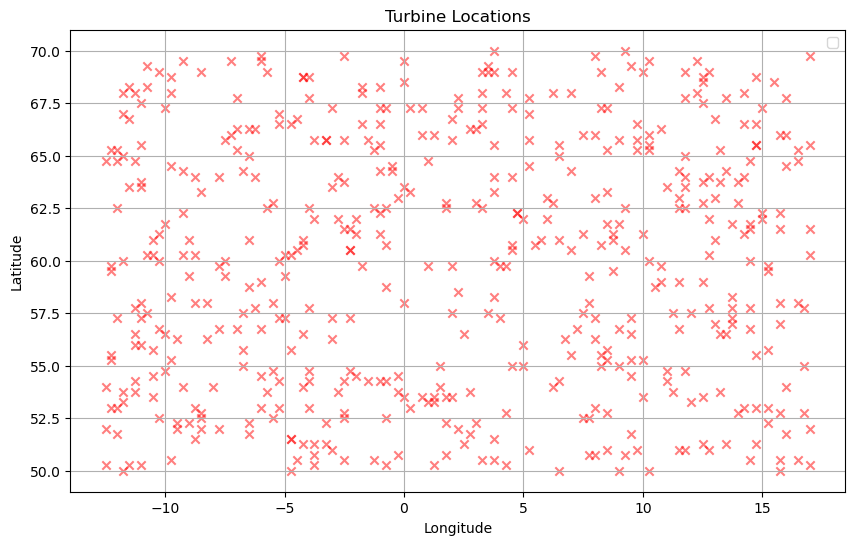

In [8]:
# Extract latitude and longitude data from the second CSV file
latitudes_2 = []
longitudes_2 = []

csv_file_path_2 = "best_coordinates1.csv"

with open(csv_file_path_2, mode='r', newline='') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if exists
    for row in reader:
        latitude, longitude = map(float, row)  # Convert values to float
        latitudes_2.append(latitude)
        longitudes_2.append(longitude)

# Plot both sets of coordinates together
plt.figure(figsize=(10, 6))
#plt.scatter(longitudes_1, latitudes_1, marker='x', label='Set 1', color='red', alpha=0.5)
plt.scatter(longitudes_2, latitudes_2, marker='x',  color='red', alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Turbine Locations")
plt.legend()
plt.grid(True)
plt.show()



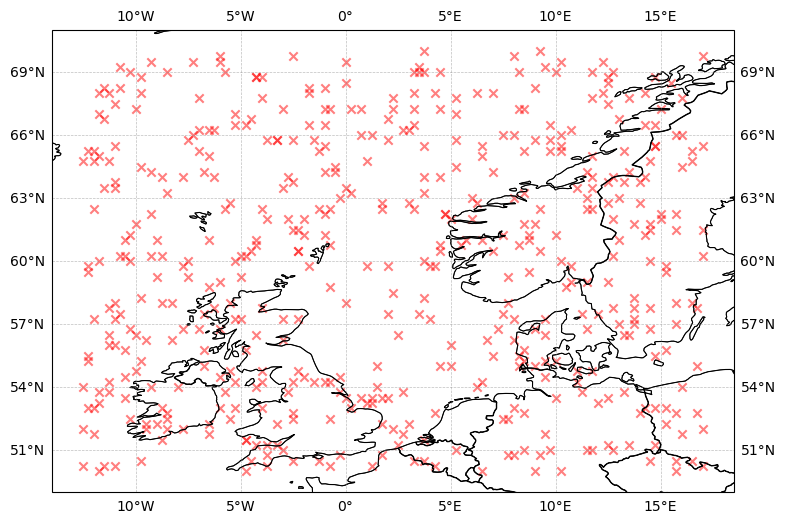

In [13]:
latitudes_2 = []
longitudes_2 = []

csv_file_path_2 = "best_coordinates1.csv"

with open(csv_file_path_2, mode='r', newline='') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row if exists
    for row in reader:
        latitude, longitude = map(float, row)  # Convert values to float
        latitudes_2.append(latitude)
        longitudes_2.append(longitude)

# Create a Cartopy plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastline
ax.add_feature(cfeature.COASTLINE, linewidth=0.8, edgecolor='black')

# Add country borders
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_countries',
    scale='50m',
    edgecolor='black',
    facecolor='none'
)
ax.add_feature(countries, linestyle='-', linewidth=0.5)

# Add borders to specific countries (e.g., Germany and France)
borders = cfeature.BORDERS
ax.add_feature(borders, linestyle='-', linewidth=1, edgecolor='black', facecolor='none', zorder=10)

# Plot turbine locations
ax.scatter(longitudes_2, latitudes_2, marker='x', color='red', alpha=0.5, transform=ccrs.PlateCarree())

# Add grid lines and labels
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


plt.show()



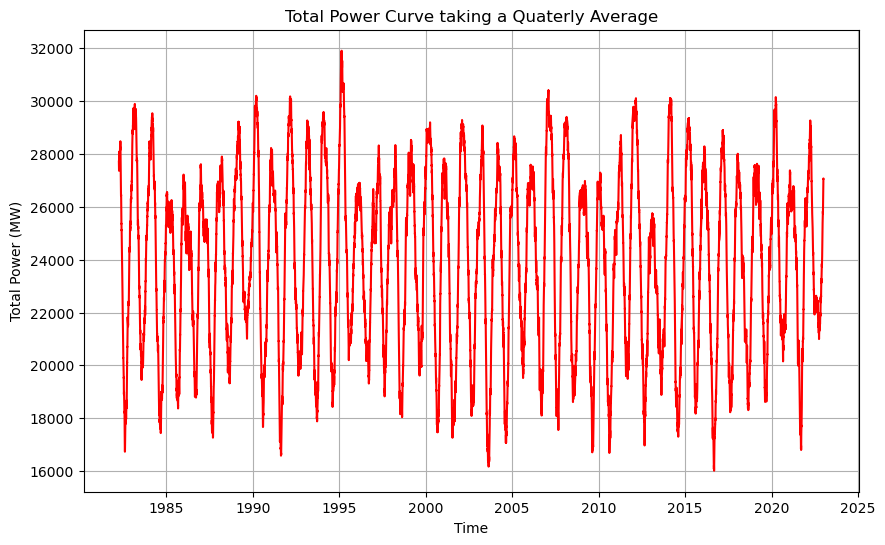

Standard deviation of the power curve, when fitness = -0.0099: 3412.7236328125


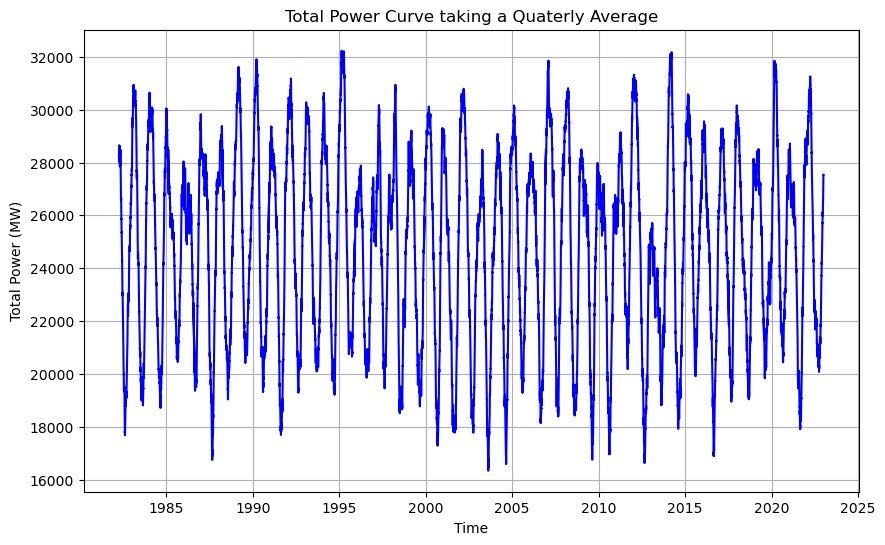

Standard deviation of the power curve, when fitness = -0.011: 3658.528076171875


In [139]:
# Define the coordinates for the first set of turbines
coordinates_1 = [ # -0.009859851820655862
    (63.0, 10.25),
    (53.5, 12.25),
    (53.5, -11.0),
    (65.5, -6.5),
    (63.75, -11.5)
]


# Initialize a variable to store the sum of power curves for the first set of turbines
total_power_curve1 = 0

# Loop through all coordinates and add the power curves together for the first set of turbines
for latitude, longitude in coordinates1:
    power_ds_subset = ds.sel(latitude=latitude, longitude=longitude)['power']
    total_power_curve1 += power_ds_subset

# Calculate the rolling average for the total power curve for the first set of turbines
rolling_avg_total1 = total_power_curve1.rolling(time=2190).mean()

# Plotting the total power curve and its rolling average for the first set of turbines
plt.figure(figsize=(10, 6))

plt.plot(rolling_avg_total1.time, rolling_avg_total1, color='red')
plt.title('Total Power Curve taking a Quaterly Average')
plt.xlabel('Time')
plt.ylabel('Total Power (MW)')

plt.grid(True)
plt.show()

# Measure the standard deviation for the first set of turbines
std_deviation1 = rolling_avg_total1.std().compute().item()  # <-- Compute the standard deviation
print("Standard deviation of the power curve, when fitness = -0.0099:", std_deviation1)


# Define the coordinates for the second set of turbines
# Define the coordinates for the turbines
coordinates2 = [ #fitness = --0.011141574995180842
    (68.75, -11.5),
    (68.5, 7.0),
    (53.75, 15.25),
    (68.0, -11.75),
    (60.0, 4.0)
]


# Initialize a variable to store the sum of power curves for the second set of turbines
total_power_curve2 = 0

# Loop through all coordinates and add the power curves together for the second set of turbines
for latitude, longitude in coordinates2:
    power_ds_subset = ds.sel(latitude=latitude, longitude=longitude)['power']
    total_power_curve2 += power_ds_subset

# Calculate the rolling average for the total power curve for the second set of turbines
rolling_avg_total2 = total_power_curve2.rolling(time=2190).mean()

# Plotting the total power curve and its rolling average for the second set of turbines
plt.figure(figsize=(10, 6))

plt.plot(rolling_avg_total2.time, rolling_avg_total2, color='blue')
plt.title('Total Power Curve taking a Quaterly Average')
plt.xlabel('Time')
plt.ylabel('Total Power (MW)')

plt.grid(True)
plt.show()

# Measure the standard deviation for the second set of turbines
std_deviation2 = rolling_avg_total2.std().compute().item()  # <-- Compute the standard deviation
print("Standard deviation of the power curve, when fitness = -0.011:", std_deviation2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


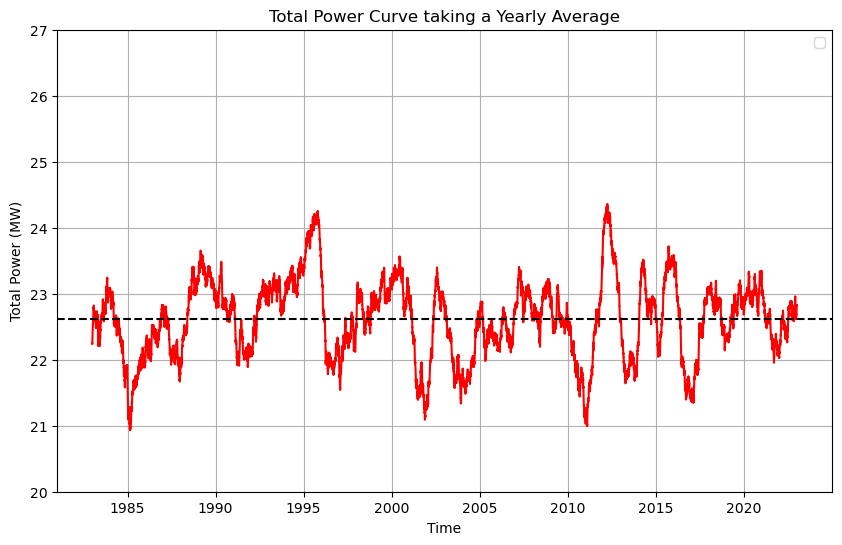

Standard deviation of the power curve, when fitness = -0.011: 0.5941797494888306


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


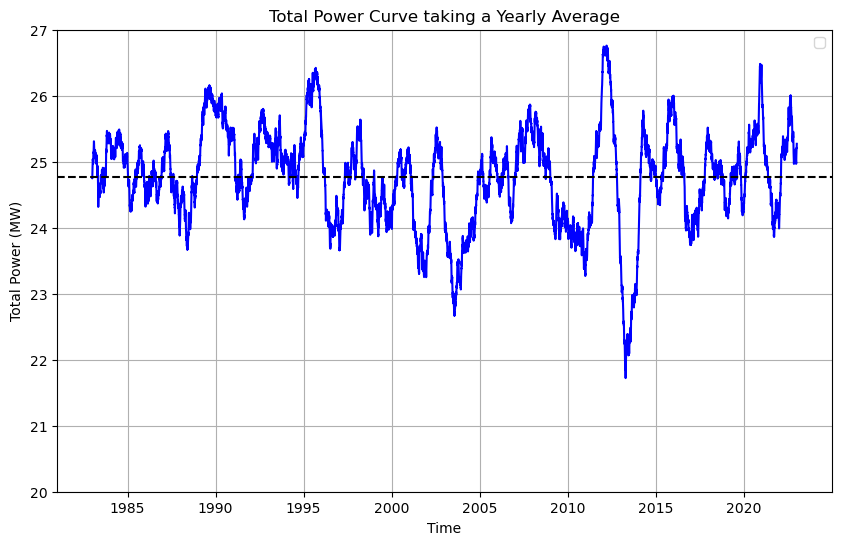

Standard deviation of the power curve, when fitness = -0.011: 0.746416449546814


In [14]:
# Define the coordinates for the first set of turbines
coordinates_1 = [ # -0.009859851820655862
    (63.0, 10.25),
    (53.5, 12.25),
    (53.5, -11.0),
    (65.5, -6.5),
    (63.75, -11.5)
]


# Initialize a variable to store the sum of power curves for the first set of turbines
total_power_curve1 = 0

# Loop through all coordinates and add the power curves together for the first set of turbines
for latitude, longitude in coordinates_1:
    power_ds_subset = ds.sel(latitude=latitude, longitude=longitude)['power']
    total_power_curve1 += power_ds_subset/1000
    
    

# Calculate the rolling average for the total power curve for the first set of turbines
rolling_avg_total1 = total_power_curve1.rolling(time=8760).mean()

mean_y_value = rolling_avg_total1.mean().values

# Plotting the total power curve and its rolling average for the first set of turbines
plt.figure(figsize=(10, 6))

plt.plot(rolling_avg_total1.time, rolling_avg_total1, color='red')
plt.axhline(y=mean_y_value, linestyle='--', color='black')
plt.title('Total Power Curve taking a Yearly Average')
plt.xlabel('Time')
plt.ylabel('Total Power (MW)')
plt.ylim(20,27)
plt.legend()
plt.grid(True)
plt.show() 

# Measure the standard deviation for the second set of turbines
std_deviation1 = rolling_avg_total1.std().compute().item()  # <-- Compute the standard deviation
print("Standard deviation of the power curve, when fitness = -0.011:", std_deviation1)



# Define the coordinates for the second set of turbines
# Define the coordinates for the turbines
coordinates2 = [ #fitness = --0.011141574995180842
    (68.75, -11.5),
    (68.5, 7.0),
    (53.75, 15.25),
    (68.0, -11.75),
    (60.0, 4.0)
]


# Initialize a variable to store the sum of power curves for the second set of turbines
total_power_curve2 = 0

# Loop through all coordinates and add the power curves together for the second set of turbines
for latitude, longitude in coordinates2:
    power_ds_subset = ds.sel(latitude=latitude, longitude=longitude)['power']
    total_power_curve2 += power_ds_subset/1000

# Calculate the rolling average for the total power curve for the second set of turbines
rolling_avg_total2 = total_power_curve2.rolling(time=8760).mean()

mean_y_value2 = rolling_avg_total2.mean().values

# Plotting the total power curve and its rolling average for the second set of turbines
plt.figure(figsize=(10, 6))

plt.plot(rolling_avg_total2.time, rolling_avg_total2, color='blue')
plt.axhline(y=mean_y_value2, linestyle='--', color='black')
plt.title('Total Power Curve taking a Yearly Average')
plt.xlabel('Time')
plt.ylabel('Total Power (MW)')
plt.ylim(20,27)
plt.legend()
plt.grid(True)
plt.show()

# Measure the standard deviation for the second set of turbines
std_deviation2 = rolling_avg_total2.std().compute().item()  # <-- Compute the standard deviation
print("Standard deviation of the power curve, when fitness = -0.011:", std_deviation2)


